# [MINI_Kaggle] Face Emotion classification with AffectNet


<img src=https://miro.medium.com/max/4408/1*Dahjzk4_GsaFH-kRXHfaiw.png width=50%>







<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Description" data-toc-modified-id="Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Description</a></span></li><li><span><a href="#Prizes" data-toc-modified-id="Prizes-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Prizes</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Base-Line" data-toc-modified-id="Base-Line-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Base Line</a></span></li><li><span><a href="#Data-load" data-toc-modified-id="Data-load-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data load</a></span></li><li><span><a href="#LeNet" data-toc-modified-id="LeNet-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>LeNet</a></span></li><li><span><a href="#Train-and-valid" data-toc-modified-id="Train-and-valid-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Train and valid</a></span></li><li><span><a href="#Test" data-toc-modified-id="Test-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Test</a></span></li></ul></div>

---

## Description

AffectNet
- 1,000,000 images with facial landmarks
- 450,000 images annotated manually 
- 8 emotion categories
- Valence and arousal(continuous)


refer. 
- [[1]](https://arxiv.org/pdf/1708.03985.pdf) AffectNet: A Database for Facial Expression, Valence, and Arousal Computing in the Wild

## Prizes

I have no idea... 👀🏆 Good Luck

## Data

You can download from below:
train_set https://drive.google.com/file/d/1g6NYnHvbibYjLAeVGdY2OB0gfZkEpuKz/view?usp=sharing

test_set https://drive.google.com/file/d/1itrsW_uq9PJBdV4ierbOhlC5ZYVvNI5q/view?usp=sharing

```
===============================
8 emotion categories
        1) Neutral
        2) Happy
        3) Sad
        4) Surprise
        5) Fear
        6) Disgust
        7) Anger


Evaluation Metrics = Root Mean Square Error(RMSE) 

===============================
```

In [1]:
LABEL=['Neutral','Happy','Sad','Surprise','Fear','Disgust','Anger']

# IMPORT DATA

## Python Library

In [2]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torchvision import datasets, transforms
from PIL import Image
from sklearn.preprocessing import LabelEncoder
import os

In [3]:
class my_data(Dataset):
    def __init__(self, data_root,transform=None,train=True):
        self.LABEL=['Neutral','Happy','Sad','Surprise','Fear','Disgust','Anger']
        self.samples = []
        self.label_num=[]
        self.race_codec = LabelEncoder()
        self.train=train
        if self.train:
            for label in os.listdir(data_root):
                label_folder = os.path.join(data_root, label)
                self.label_num.append(len(os.listdir(label_folder)))
                for img_name in os.listdir(label_folder):
                    self.samples.append( os.path.join(label_folder, img_name))
        else:
             for img_name in os.listdir(data_root):
                    self.samples.append( os.path.join(data_root, img_name))
                
        if self.train:
            for i in range(len(self.label_num)):
                print(f'{self.LABEL[i]}: {self.label_num[i]}')
                
        if transform == None:
            self.transform=transforms.Compose([transforms.Resize((128,128)),
                                            transforms.ToTensor(),
                                            transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))])
            
        else:
            self.transform =transform
            
            
    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        tmp_num = self.samples[idx].find('label_')+6
        if self.train:
            label_index=self.samples[idx][tmp_num:tmp_num+1]
        else:
            label_index=0
        
        img= Image.open(self.samples[idx])
        
        img=self.transform(img)
        return img,torch.tensor(int(label_index)),self.samples[idx]

In [4]:
train_data=my_data('resized_img',train=True)
test_data=my_data('affectnet_test_data',train=False)

Neutral: 10862
Happy: 16817
Sad: 5921
Surprise: 4784
Fear: 4013
Disgust: 3755
Anger: 5863


In [5]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np
import random

In [6]:
train_data.label_num

[10862, 16817, 5921, 4784, 4013, 3755, 5863]

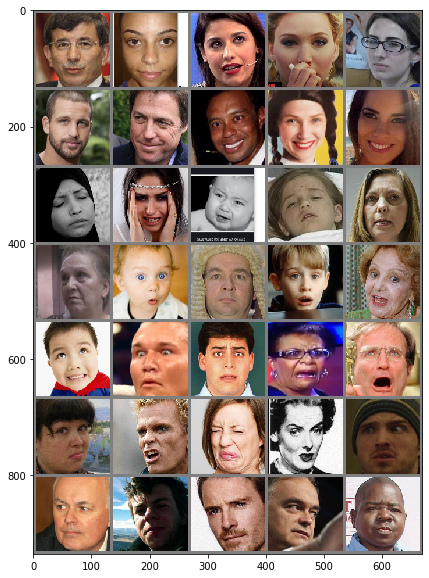

In [7]:
def show(img):
    npimg = img.numpy()
    
    plt.figure(figsize=(20,10))
    plt.imshow(np.transpose(npimg, (1,2,0))*0.5+0.5, interpolation='nearest')
num_sample=5

Neutral_label=(random.sample(range(10682), num_sample))
Happy_label=(random.sample(range(10862,27679), num_sample))
Sad_label=(random.sample(range(27679,33600), num_sample))
Surprise_label=(random.sample(range(33600,38384), num_sample))
Fear_label=(random.sample(range(38384,42397), num_sample))
Disgust_label=(random.sample(range(42397,46152), num_sample))
Anger_label=(random.sample(range(46152,52015), num_sample))

LABEL_INDEX=Neutral_label+Happy_label+Sad_label+Surprise_label+Fear_label+Disgust_label+Anger_label
imglist=[]
for i in LABEL_INDEX:
    imglist.append(train_data[i][0])
show(make_grid(imglist,nrow=num_sample ,padding=5))

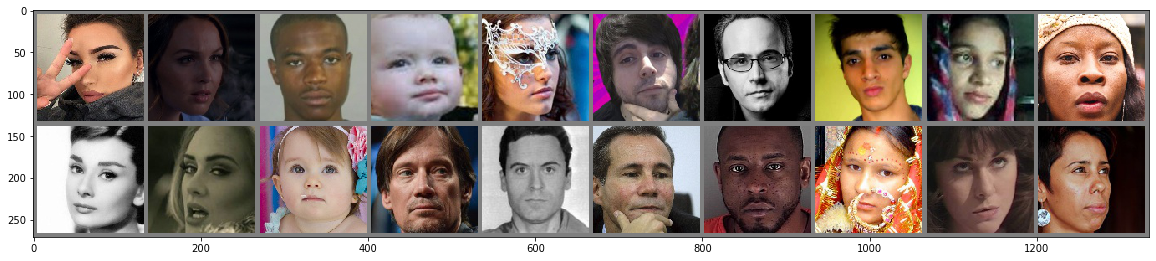

In [31]:
test_index=random.sample(range(0,3500), 20)
imglist=[]
for i in test_index:
    imglist.append(train_data[i][0])
show(make_grid(imglist,nrow=10 ,padding=5))

In [10]:
train_len = int(0.7*len(train_data))
valid_len = len(train_data) - train_len
train_set,val_set=torch.utils.data.random_split(train_data,[train_len,valid_len])

In [11]:
# train_list=[]
# for  i in train_set:
#     train_list.append(i[1].item())
    
    
# from collections import Counter 
# train_label_distrib=Counter(train_list)
# print(train_label_distrib)
# valid_set_label=[]
# for  i in val_set:
#     valid_set_label.append(i[1].item())
    
    
# from collections import Counter 
# val_label_distrib=Counter(valid_set_label)
# print(val_label_distrib)

## Data load

In [12]:
train_dataloader = torch.utils.data.DataLoader(
        train_set, batch_size=64, shuffle=True)


val_dataloader = torch.utils.data.DataLoader(
        val_set, batch_size=64, shuffle=False)

## Simple CNN

In [13]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.layer = nn.Sequential(
            nn.Conv2d(3,16,5), 
            nn.ReLU(),
            nn.Conv2d(16,32,5),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(32,64,5),  
            nn.ReLU(),
            nn.MaxPool2d(2,2)
        )
        self.fc_layer = nn.Sequential(
            nn.Linear(50176, 100),
            nn.ReLU(),
            nn.Linear(100,7)
        )       

    def forward(self,x):
        out = self.layer(x)
        out = out.view(x.size(0),-1)
        out = self.fc_layer(out)

        return out
    
model = CNN()    

In [15]:
total_params = sum(p.numel() for p in model.parameters())
print("Num of Total Parameter : ",total_params)
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("Num of Trainable Parameter :",trainable_params)

Num of Total Parameter :  5083719
Num of Trainable Parameter : 5083719


## Train and valid

In [16]:
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

optimizer = torch.optim.Adam(model.parameters(),lr=1e-4)
loss = nn.CrossEntropyLoss()
model=model.to(DEVICE)

In [17]:
def compute_accuracy(model, data_loader,loss):
    model.eval()
    curr_loss,correct_pred, num_examples = 0,0, 0
    with torch.no_grad():
        for i, (features, targets,_) in enumerate(data_loader):

            features = features.to(DEVICE)
            targets = targets.to(DEVICE)

            logits = model(features)
            cost = loss(logits, targets)
            curr_loss += cost.item()
            _, predicted_labels = torch.max(logits, 1)
            num_examples += targets.size(0)
            correct_pred += (predicted_labels == targets).sum()
        curr_loss = curr_loss / num_examples
    return correct_pred.float()/num_examples * 100,curr_loss




In [18]:
import time
train_loss=[]
valid_loss=[]
valid_accuracy=[]
num_epochs=20
start_time = time.time()

for epoch in range(num_epochs):

    model.train()
    for batch_idx, (features, targets,_) in enumerate(train_dataloader):
        
        features = features.to(DEVICE)
        targets = targets.to(DEVICE)
            
        ### FORWARD AND BACK PROP
        logits = model(features)
        cost = loss(logits, targets)
        optimizer.zero_grad()
        cost.backward()
        
        ### UPDATE MODEL PARAMETERS
        optimizer.step()
        
        ### LOGGING
        if not batch_idx % 100:
            print ('Epoch: %03d/%03d | Batch %04d/%04d | Cost: %.4f' 
                   %(epoch+1, num_epochs, batch_idx, 
                     len(train_dataloader), cost.item()))
            train_loss.append(cost.item())

    model.eval()
    with torch.set_grad_enabled(False): # save memory during inference
        accuracy,cost=compute_accuracy(model, val_dataloader,loss)
        valid_loss.append(cost)
        valid_accuracy.append(accuracy)
        print('Epoch: %03d/%03d | Accuracy: %.3f%% | Loss: %.3f' % (
              epoch+1, num_epochs, 
              accuracy,
              cost))

    torch.save(model,"model.h")

    print('Time elapsed: %.2f min' % ((time.time() - start_time)/60))
    
print('Total Training Time: %.2f min' % ((time.time() - start_time)/60))

Epoch: 001/020 | Batch 0000/0569 | Cost: 1.9359
Epoch: 001/020 | Batch 0100/0569 | Cost: 1.7364
Epoch: 001/020 | Batch 0200/0569 | Cost: 1.6831
Epoch: 001/020 | Batch 0300/0569 | Cost: 1.5082
Epoch: 001/020 | Batch 0400/0569 | Cost: 1.4811
Epoch: 001/020 | Batch 0500/0569 | Cost: 1.4753
Epoch: 001/020 | Accuracy: 47.985% | Loss: 0.022
Time elapsed: 0.80 min
Epoch: 002/020 | Batch 0000/0569 | Cost: 1.3950


C:\Users\HyunSeung\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type CNN. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\HyunSeung\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sequential. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\HyunSeung\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Conv2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\HyunSeung\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type ReLU. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C

Epoch: 002/020 | Batch 0100/0569 | Cost: 1.3564
Epoch: 002/020 | Batch 0200/0569 | Cost: 1.3309
Epoch: 002/020 | Batch 0300/0569 | Cost: 1.5059
Epoch: 002/020 | Batch 0400/0569 | Cost: 1.5198
Epoch: 002/020 | Batch 0500/0569 | Cost: 1.3810
Epoch: 002/020 | Accuracy: 51.548% | Loss: 0.021
Time elapsed: 1.58 min
Epoch: 003/020 | Batch 0000/0569 | Cost: 1.3079
Epoch: 003/020 | Batch 0100/0569 | Cost: 1.1169
Epoch: 003/020 | Batch 0200/0569 | Cost: 1.0921
Epoch: 003/020 | Batch 0300/0569 | Cost: 1.5622
Epoch: 003/020 | Batch 0400/0569 | Cost: 1.4661
Epoch: 003/020 | Batch 0500/0569 | Cost: 1.3097
Epoch: 003/020 | Accuracy: 53.617% | Loss: 0.020
Time elapsed: 2.35 min
Epoch: 004/020 | Batch 0000/0569 | Cost: 1.1446
Epoch: 004/020 | Batch 0100/0569 | Cost: 1.2945
Epoch: 004/020 | Batch 0200/0569 | Cost: 1.3547
Epoch: 004/020 | Batch 0300/0569 | Cost: 1.3911
Epoch: 004/020 | Batch 0400/0569 | Cost: 1.3675
Epoch: 004/020 | Batch 0500/0569 | Cost: 1.2002
Epoch: 004/020 | Accuracy: 54.438% | Los

## Test

In [24]:
test_dataloader = torch.utils.data.DataLoader(
        test_data, batch_size=32, shuffle=False)

In [25]:
ans=[]

with torch.set_grad_enabled(False): # save memory during inference
        for batch_idx, (features, _,_) in enumerate(test_dataloader):       
            features = features.to(DEVICE)
            logits = model(features)
            _, predicted_labels = torch.max(logits, 1)
            for i in list(predicted_labels.detach()):
                ans.append(i.item())

            


In [26]:
import pandas as pd

df=pd.read_csv('submision.csv',index_col='file_name')
print(df.head())
df['label']=ans
print(df.head())

            label
file_name        
00000.jpeg    NaN
00001.jpeg    NaN
00002.jpeg    NaN
00003.jpeg    NaN
00004.jpeg    NaN
            label
file_name        
00000.jpeg      1
00001.jpeg      0
00002.jpeg      4
00003.jpeg      3
00004.jpeg      6


In [29]:
import datetime

# DeFault:
today = datetime.datetime.now()
DATE = str(today.month)+'_'+str(today.day) +'_' + str(today.hour)+'_'+str(today.minute)

#Write down your name
NAME = 'HYUNSEUNG'

In [30]:
df.to_csv(f'./test_{NAME}_{DATE}.csv')